## Exploration Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer. 

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named `explore.ipynb`. In addition, you should create a file named `explore.py` that contains the following functions for exploring your variables (features & target).

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

In [2]:
df = wrangle.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [3]:
train, validate, test = wrangle.split_telco(df)
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

2. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [4]:
train.drop(columns=['customer_id']).corr()

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.399844,0.936650
tenure,0.399844,1.000000,0.636541
total_charges,0.936650,0.636541,1.000000


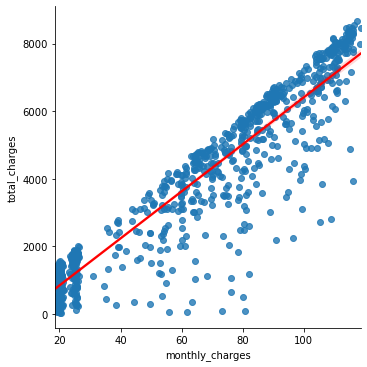

In [5]:
sns.lmplot(x='monthly_charges', y='total_charges', data=train, line_kws={'color': 'red'})
plt.show()

In [6]:
def plot_variable_pairs(df, target):
    
    columns = df[list(df.select_dtypes(exclude='O').columns)].drop(columns=target)
    
    for col in columns:
        
        sns.lmplot(x=col, y=target, data=df, line_kws={'color': 'red'})
        plt.show()

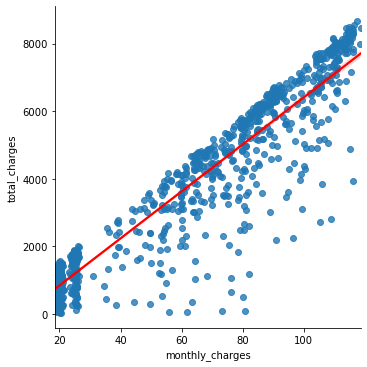

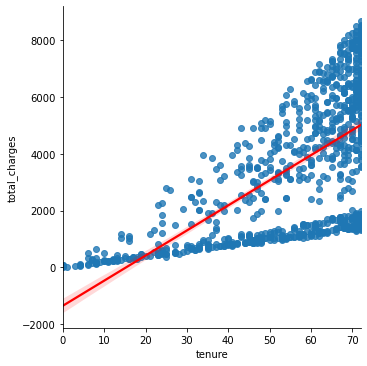

In [7]:
plot_variable_pairs(train, 'total_charges')

In [8]:
def pairplot_variable_pairs(df):
    
    columns = df[list(df.select_dtypes(exclude='O').columns)]
    
    sns.pairplot(columns, kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
    plt.show()

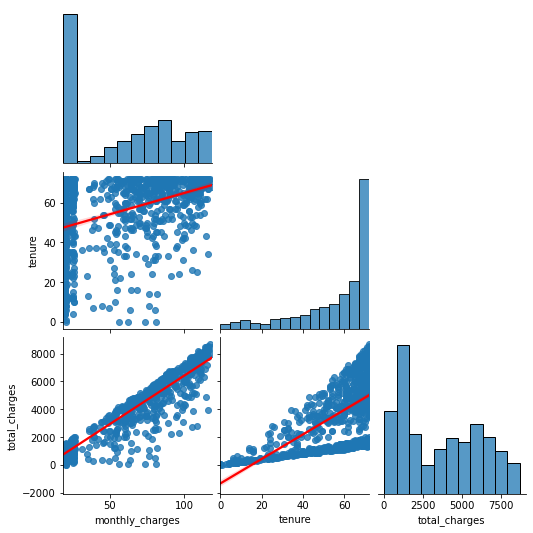

In [9]:
pairplot_variable_pairs(train)

In [10]:
train.select_dtypes(exclude='O').columns

Index(['monthly_charges', 'tenure', 'total_charges'], dtype='object')

3. Write a function named `months_to_years` that accepts your telco churn dataframe and returns a dataframe with a new feature `tenure_years`, in complete years as a customer.

In [11]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
1063,6407-GSJNL,24.95,51,1288.0
1528,9027-TMATR,78.80,43,3460.3
1297,7663-YJHSN,103.95,72,7556.9
1676,9906-NHHVC,53.50,65,3517.9
1583,9365-CSLBQ,24.35,71,1654.6


In [31]:
def months_to_years(df):
    
    df['tenure_years'] = (df.tenure // 12)
    
    return df

In [13]:
months_to_years(train)
train.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
1063,6407-GSJNL,24.95,51,1288.0,4
1528,9027-TMATR,78.80,43,3460.3,3
1297,7663-YJHSN,103.95,72,7556.9,6
1676,9906-NHHVC,53.50,65,3517.9,5
1583,9365-CSLBQ,24.35,71,1654.6,5


4. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

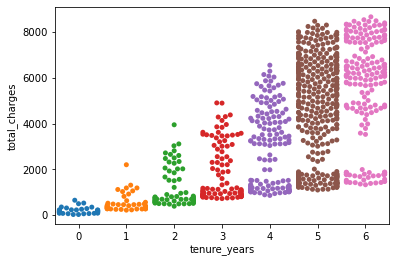

In [14]:
sns.swarmplot(x='tenure_years', y='total_charges', data=train)

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

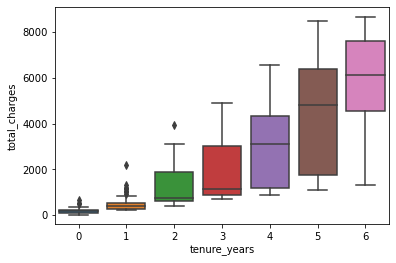

In [15]:
sns.boxplot(x='tenure_years', y='total_charges', data=train)

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

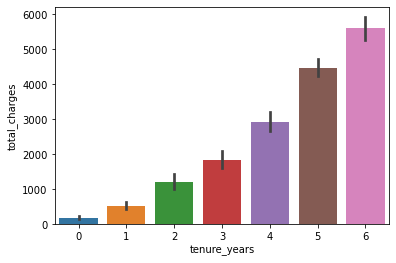

In [16]:
sns.barplot(x='tenure_years', y='total_charges', data=train)

In [17]:
def plot_categorical_and_continuous_vars(df, catagorical_var, continuous_var):
    
    sns.barplot(x=catagorical_var, y=continuous_var, data=df)
    plt.show()
    sns.swarmplot(x=catagorical_var, y=continuous_var, data=df)
    plt.show()
    sns.boxplot(x=catagorical_var, y=continuous_var, data=df)
    plt.show()

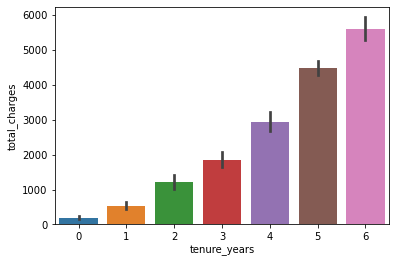

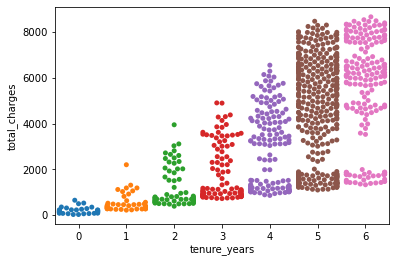

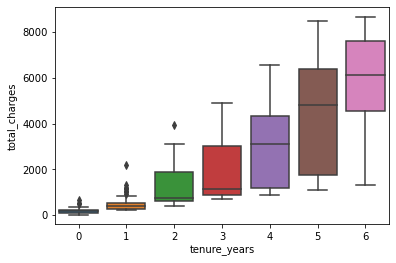

In [18]:
plot_categorical_and_continuous_vars(train, 'tenure_years', 'total_charges')

5. Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.

In [19]:
import explore

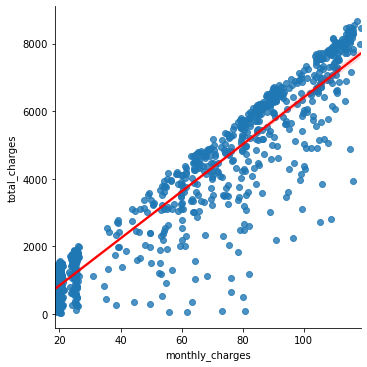

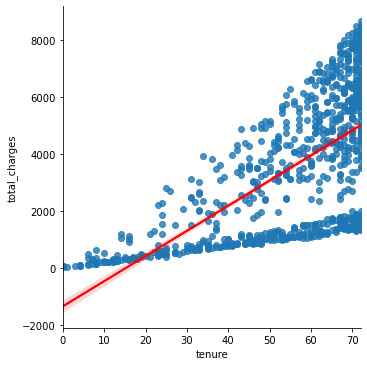

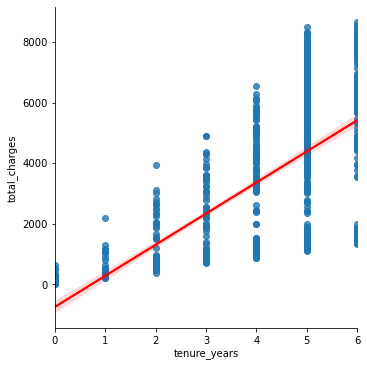

In [20]:
explore.plot_variable_pairs(train, 'total_charges')

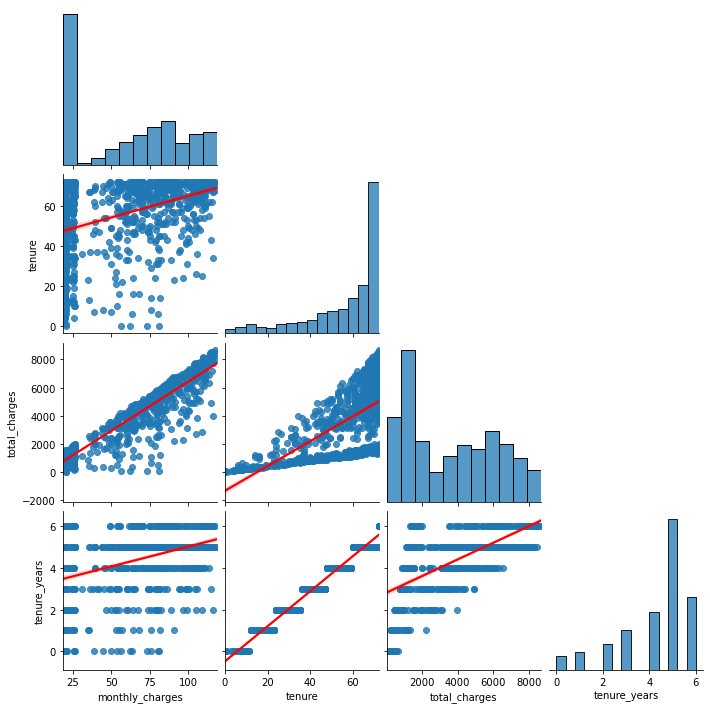

In [21]:
explore.pairplot_variable_pairs(train)

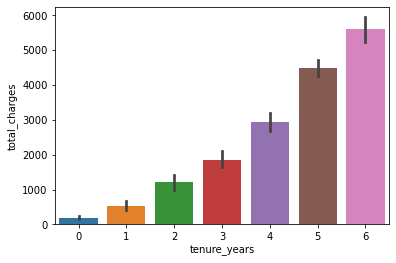

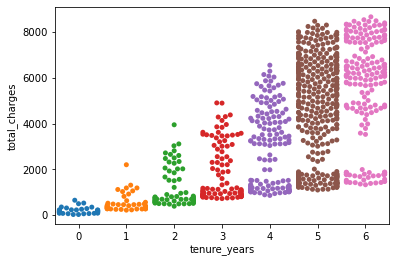

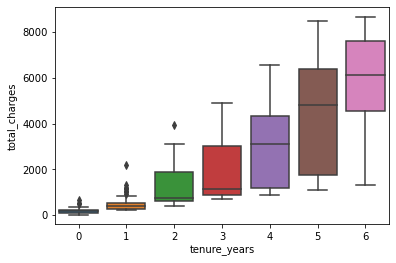

In [22]:
explore.plot_categorical_and_continuous_vars(train, 'tenure_years', 'total_charges')

6. Explore your dataset with any other visualizations you think will be helpful.

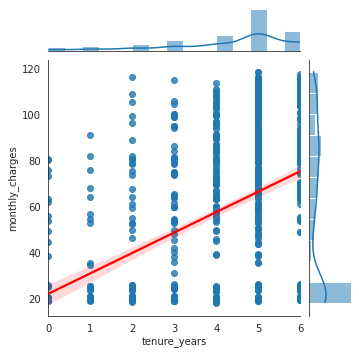

In [23]:
with sns.axes_style('white'):
    j = sns.jointplot(x='tenure_years', y='monthly_charges', data=train,  kind='reg', joint_kws={'line_kws':{'color':'red'}}, height=5);
plt.show()

7. In a seperate notebook, use the functions you have developed in this exercise with the `mall_customers` dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make `spending_score` your target variable.

## Exercises II - Challenge

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [24]:
zillowdf = wrangle.wrangle_zillow()
zillowdf.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [26]:
train, validate, test = wrangle.split_zillow(zillowdf)
train.shape, validate.shape, test.shape

((1198531, 7), (513657, 7), (428047, 7))

1. Use the functions you created above to explore your Zillow train dataset in your `explore.ipynb` notebook.

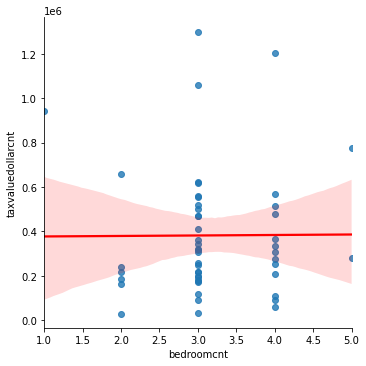

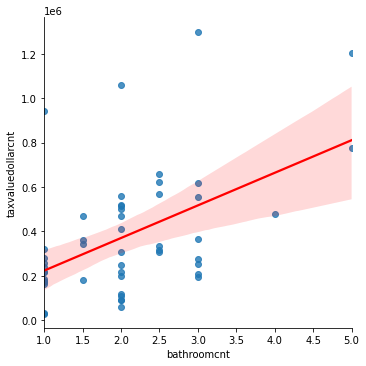

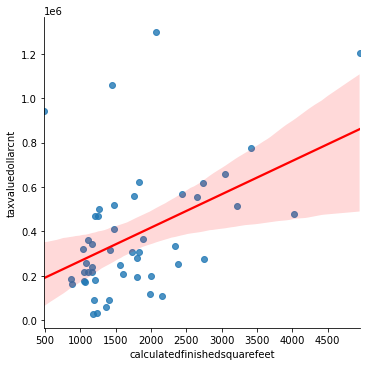

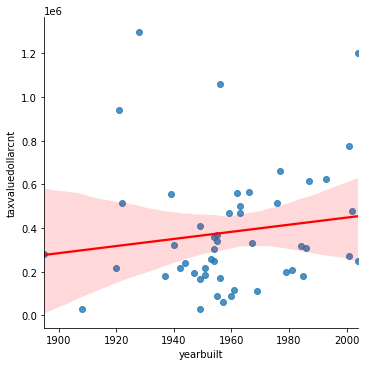

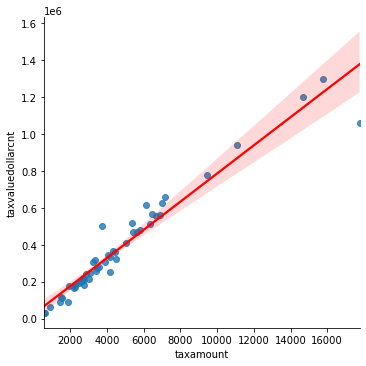

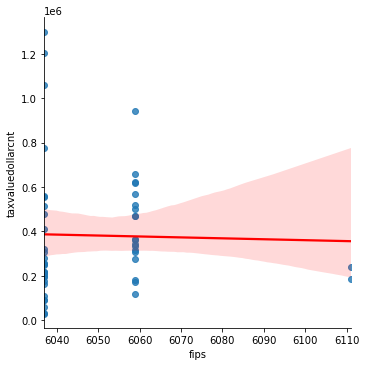

In [30]:
explore.plot_variable_pairs(train.sample(50), 'taxvaluedollarcnt')

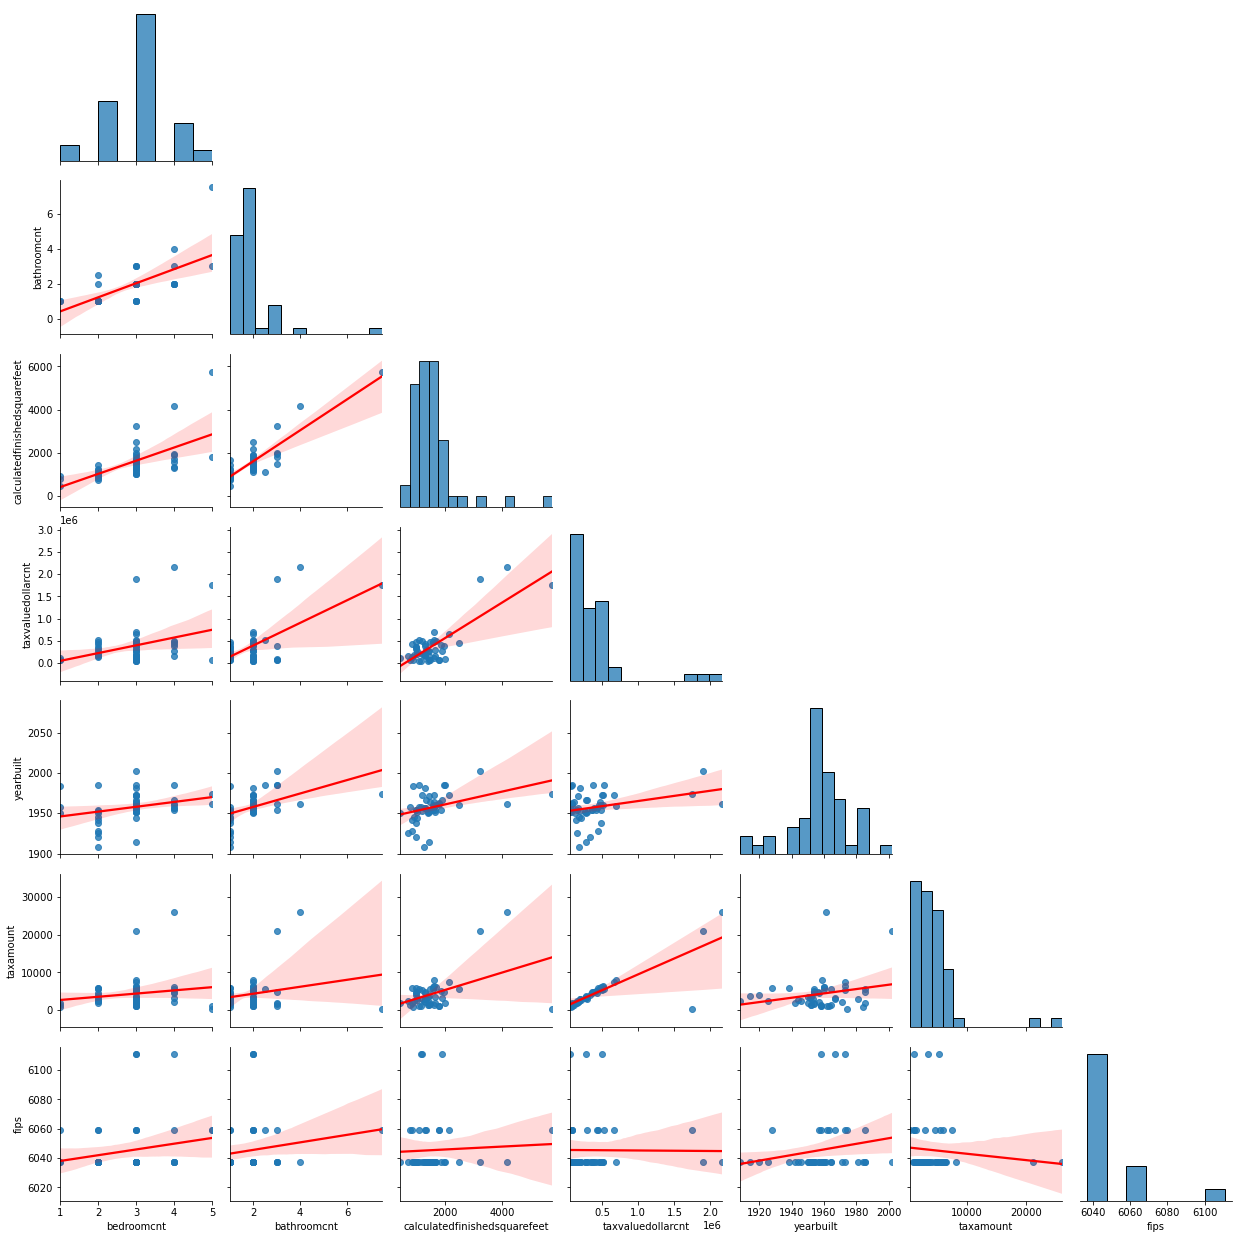

In [33]:
explore.pairplot_variable_pairs(train.sample(50))

2. Come up with some initial hypotheses based on your goal of predicting property value.